In [1]:
# Module importieren
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2023-11-29 10:44:59.126351: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data=pd.read_csv('SPAM text message 20170820 - Data.csv')

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

<Axes: xlabel='count', ylabel='Category'>

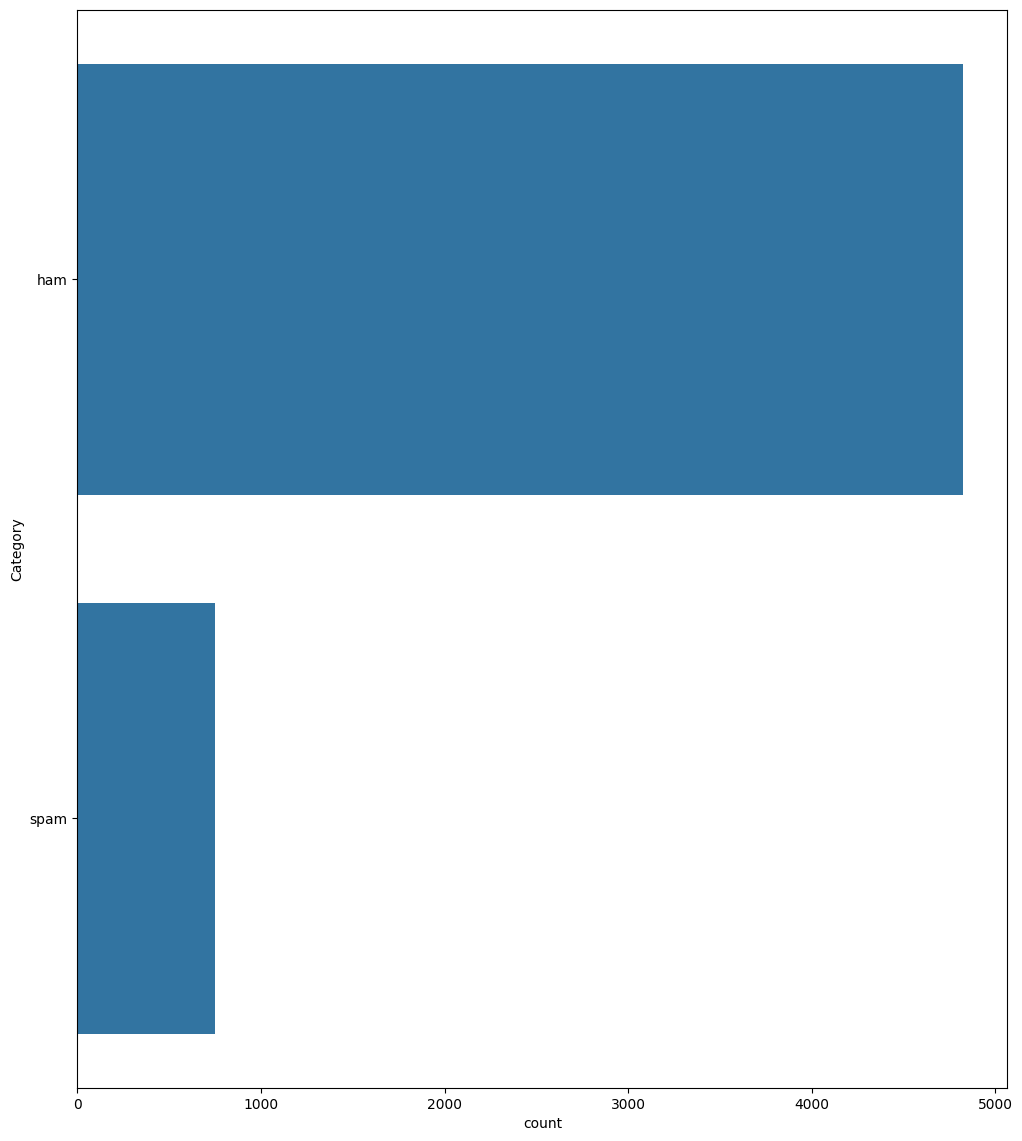

In [5]:
import seaborn as sns
plt.figure(figsize=(12,14))
sns.countplot(data['Category'])

Da die Daten unausgewogen sind, müssen wir sie ausbalancieren. Wir werden die Technik des Downsamplings anwenden (zufällige Auswahl von ham_msg mit der gleichen Länge wie spam msg).

In [6]:
ham_msg = data[data.Category =='ham']
spam_msg = data[data.Category=='spam']

In [7]:
#randomly taking data from ham_ msg
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)


In [8]:
print(ham_msg.shape,spam_msg.shape)

(747, 2) (747, 2)


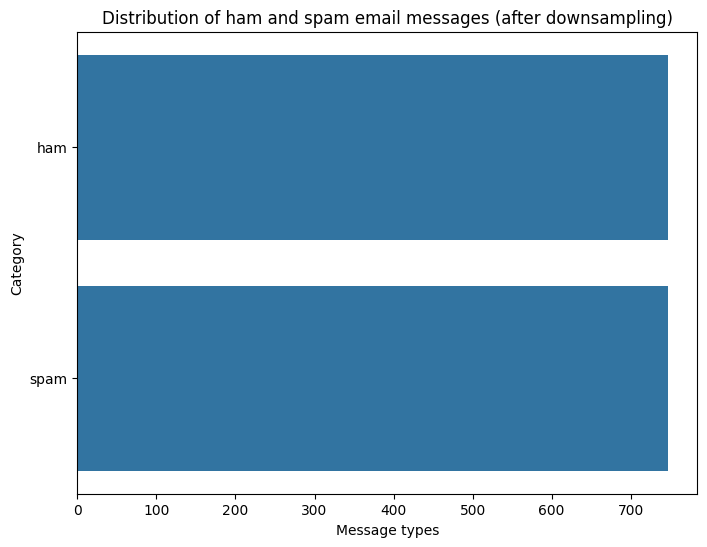

In [9]:
# Variante

import seaborn as sns
import matplotlib.pyplot as plt

# Zusammenführen der ausgewählten ham- und spam-Nachrichten
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(balanced_data['Category'])
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')
plt.show()



In [34]:
# balanced_data=ham_msg.append(spam_msg).reset_index(drop=True)
# plt.figure(figsize=(8,6))
# sns.countplot(balanced_data.Category)
# plt.title('Distribution of ham and spam email messages (after downsampling)')
# plt.xlabel('Message types')


In [10]:
balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...


In [11]:
balanced_data['label']=balanced_data['Category'].map({'ham':0,'spam':1})

In [12]:
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['Message'],balanced_data['label'],test_size=0.2,random_state=434)

In [13]:
vocab_size=500
oov_tok='<OOV>'
max_len=50

In [14]:
#preprocessing making tokens out of text
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [15]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 '2': 11,
 'and': 12,
 'is': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 '4': 23,
 'me': 24,
 'are': 25,
 'with': 26,
 'from': 27,
 'text': 28,
 'this': 29,
 'my': 30,
 'get': 31,
 'stop': 32,
 'mobile': 33,
 'just': 34,
 'no': 35,
 'it': 36,
 'will': 37,
 'reply': 38,
 'only': 39,
 'be': 40,
 'that': 41,
 'claim': 42,
 'www': 43,
 'not': 44,
 'out': 45,
 'do': 46,
 'send': 47,
 'new': 48,
 'so': 49,
 'our': 50,
 'we': 51,
 'but': 52,
 'at': 53,
 'prize': 54,
 'can': 55,
 'cash': 56,
 'all': 57,
 'if': 58,
 "i'm": 59,
 'who': 60,
 '150p': 61,
 'uk': 62,
 'go': 63,
 '1': 64,
 'nokia': 65,
 'please': 66,
 'win': 67,
 't': 68,
 'tone': 69,
 'won': 70,
 'week': 71,
 'com': 72,
 'msg': 73,
 '50': 74,
 'was': 75,
 'day': 76,
 'up': 77,
 'phone': 78,
 'by': 79,
 'been': 80,
 'what': 81,
 'want': 82,
 'service': 83,
 'know

In [16]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [17]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [18]:
#model
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])


In [19]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [20]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,callbacks=[early_stop],verbose=2)

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 - 1s - loss: 0.6868 - accuracy: 0.6393 - val_loss: 0.6773 - val_accuracy: 0.7993 - 1s/epoch - 29ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6642 - accuracy: 0.8167 - val_loss: 0.6392 - val_accuracy: 0.8562 - 85ms/epoch - 2ms/step
Epoch 3/30
38/38 - 0s - loss: 0.6111 - accuracy: 0.8561 - val_loss: 0.5614 - val_accuracy: 0.8696 - 80ms/epoch - 2ms/step
Epoch 4/30
38/38 - 0s - loss: 0.5194 - accuracy: 0.8854 - val_loss: 0.4566 - val_accuracy: 0.8896 - 82ms/epoch - 2ms/step
Epoch 5/30
38/38 - 0s - loss: 0.4169 - accuracy: 0.8921 - val_loss: 0.3632 - val_accuracy: 0.9064 - 80ms/epoch - 2ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3332 - accuracy: 0.9046 - val_loss: 0.2882 - val_accuracy: 0.9197 - 77ms/epoch - 2ms/step
Epoch 7/30
38/38 - 0s - loss: 0.2706 - accuracy: 0.9230 - val_loss: 0.2377 - val_accuracy: 0.9298 - 78ms/epoch - 2ms/step
Epoch 8/30
38/38 - 0s - loss: 0.2300 - accuracy: 0.9280 - val_loss: 0.2058 - val_accuracy: 0.9398 - 76ms/epoch - 2ms/step
Epoch 9/30
38/38 - 0s - loss: 0.1960

In [21]:
model.evaluate(Testing_pad, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9833


[0.07321018725633621, 0.9832776188850403]

Text(0.5, 0, 'epoch')

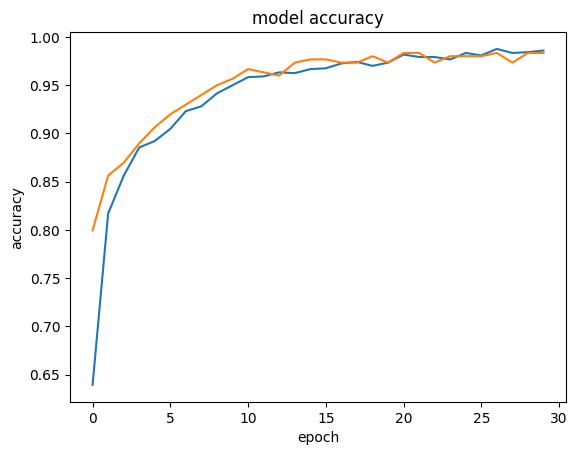

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [23]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [24]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
predict_spam(predict_msg)

1/1 [==============================] - 0s 74ms/step


array([[0.00466618],
       [0.01366068],
       [0.99992293]], dtype=float32)

In [25]:
# Variante mit Klassifizierung


# Tokenisierung und Padding der neuen Nachrichten
predict_seq = token.texts_to_sequences(predict_msg)
predict_pad = pad_sequences(predict_seq, maxlen=50, padding=padding_type, truncating=truncate_type)

# Vorhersage mit dem trainierten Modell
predictions = model.predict(predict_pad)

# Ausgabe der Vorhersagen
for i, msg in enumerate(predict_msg):
    print(f"Message: {msg}")
    print(f"Predicted Label: {round(predictions[i][0])} (1 for 'spam', 0 for 'ham')")
    print("-----------")


1/1 [==============================] - 0s 25ms/step
Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Predicted Label: 0 (1 for 'spam', 0 for 'ham')
-----------
Message: Ok lar... Joking wif u oni...
Predicted Label: 0 (1 for 'spam', 0 for 'ham')
-----------
Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Predicted Label: 1 (1 for 'spam', 0 for 'ham')
-----------
